# **Part 1: Exploring the friendship paradox.**

## *The friendship paradox in BA networks*

The friendship paradox states that, on average, one's friends will have more friends than the individual themselves. 

To explore the Friendship paradox using the Barabási-Albert model we will perform the following steps:

- Generate the BA Network: Create a BA network using NetworkX.
- Select Random Nodes: Pick a node at random and find its degree.
- Compute Neighbors' Average Degree: Find the node's neighbors and calculate their average degree.
- Check the Friendship Paradox: Compare the node's degree with the average neighbor degree to see if the paradox holds.
- Repeat and Tally Results: Repeat the process 1,000 times and record how often the paradox is true.

We start by instantiating a BA network with the required specifications:

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Parameters for the BA model
n = 5000  # Total number of nodes
m = 2     # Each new node attaches to m existing nodes

# Create the BA network
F_BA = nx.barabasi_albert_graph(n, m)

To select random nodes and compte the neighbors' average dergree we will define two functions:

- `get_node_degree`: Selects a random node and returns its degree.
- `get_average_neighbor_degree`: Calculates the average degree of a node's neighbors.

In [2]:
def get_node_degree(G):
    """Select a random node and return its degree."""
    random_node = random.choice(list(G.nodes()))
    node_degree = G.degree(random_node)
    return random_node, node_degree

def get_average_neighbor_degree(G, node):
    """Calculate the average degree of the node's neighbors."""
    neighbors = list(G.neighbors(node))
    if neighbors:
        avg_neighbor_degree = sum(G.degree(neighbor) for neighbor in neighbors) / len(neighbors)
    else:
        avg_neighbor_degree = 0  # Handle isolated nodes
    return avg_neighbor_degree

We compare the node degree with the average neighbor degree to confirm the friendship paradox. We repeat the process 1,000 times, recording whether the friendship paradox holds for each randomly selected node:

In [3]:
iterations = 1000
paradox_count = 0
results = []

for _ in range(iterations):
    node, node_degree = get_node_degree(F_BA)
    avg_neighbor_degree = get_average_neighbor_degree(F_BA, node)
    paradox_holds = avg_neighbor_degree > node_degree
    paradox_count += paradox_holds
    results.append({
        'node': node,
        'node_degree': node_degree,
        'avg_neighbor_degree': avg_neighbor_degree,
        'paradox_holds': paradox_holds
    })

# Calculate the percentage
paradox_percentage = (paradox_count / iterations) * 100

# Display the overall result
print(f"The friendship paradox holds {paradox_count} out of {iterations} times ({paradox_percentage:.2f}%).")

# Display sample results from the first 10 iterations
print("\nSample Results for the First 10 Iterations:")
print(f"{'Iteration':>9} | {'Node':>5} | {'Node Degree':>12} | {'Avg Neighbor Degree':>20} | {'Paradox Holds':>14}")
print("-" * 75)
for i, result in enumerate(results[:10], 1):
    print(f"{i:9} | {result['node']:5} | {result['node_degree']:12} | {result['avg_neighbor_degree']:20.2f} | {'Yes' if result['paradox_holds'] else 'No':>14}")


The friendship paradox holds 886 out of 1000 times (88.60%).

Sample Results for the First 10 Iterations:
Iteration |  Node |  Node Degree |  Avg Neighbor Degree |  Paradox Holds
---------------------------------------------------------------------------
        1 |  4235 |            2 |                22.50 |            Yes
        2 |  1249 |            3 |                 5.33 |            Yes
        3 |  4728 |            2 |                18.50 |            Yes
        4 |  1469 |            3 |                 5.00 |            Yes
        5 |  3598 |            2 |                 7.50 |            Yes
        6 |  2711 |            5 |                 3.60 |             No
        7 |  2790 |            5 |                 8.00 |            Yes
        8 |  1347 |            2 |                 5.50 |            Yes
        9 |   631 |            5 |                18.00 |            Yes
       10 |   173 |           17 |                 6.94 |             No


Let's visualize the F-BA network:

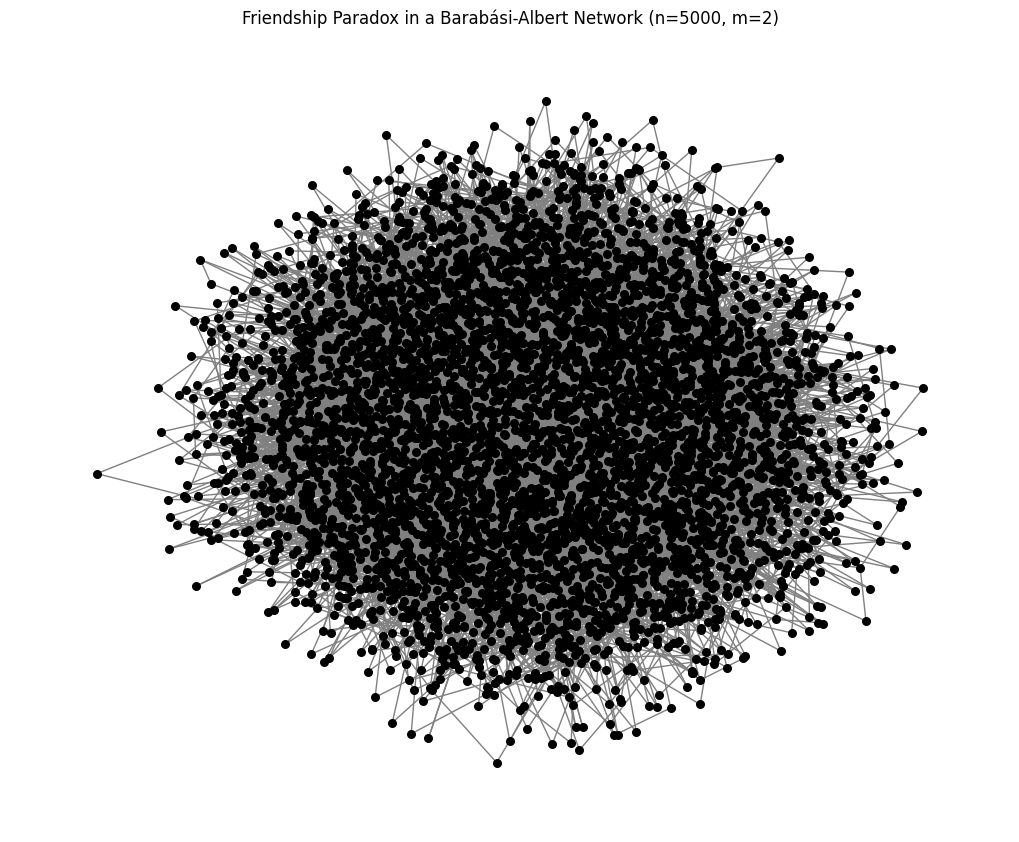

In [4]:
plt.figure(figsize=(10, 8))
nx.draw(F_BA, with_labels=False, node_color='black', node_size=30, edge_color='gray')
plt.title(f"Friendship Paradox in a Barabási-Albert Network (n=5000, m=2)")
plt.show()

**Conclusion:**

We showed that in our simulation of a Barabási-Albert network, the friendship paradox holds true approximately 88% of the time, confirming that most nodes have fewer connections than the average number of connections of their neighbors due to the network's scale-free structure.

## *The friendship paradox more generally*

#### **What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower?**

##### **Reasoning:**

When the power-law distribution is flatter $\gamma = 2$ (compared to a steeper distribution $\gamma \approx 3$ as in the BA model), the degree distribution has a heavier tail. This means:

- **More High-Degree Nodes (Hubs):** A flatter power law indicates that high-degree nodes are more common.
- **Increased Connectivity to Hubs:** Low-degree nodes are more likely to be connected to these high-degree hubs.
- **Effect on the Friendship Paradox:** Since more nodes are connected to hubs, the average degree of a node's neighbors will be higher, making the friendship paradox more pronounced.

In short, the fraction of times the friendship paradox is true should be **higher** in a network with a flatter power-law degree distribution  $\gamma = 2$.

##### **Simulation**

We'll simulate a network with $\gamma = 2$ using the configuration model and test whether our reasoning holds.

**Steps:**

1. **Generate a Degree Sequence Following** $p(k) \sim k^{-2} $.
2. **Create a Network Using the Configuration Model with This Degree Sequence.**
3. **Perform Multiple Iterations to Test the Friendship Paradox.**
4. **Compare the Results with Our Reasoning.**

We need to generate a sequence of degrees that follow the power-law distribution $ p(k) \sim k^{-2} $.

**Using the Transformation Method:**

The transformation method allows us to generate random numbers following a power-law distribution.

The formula is:

$$
k = k_{\text{min}} \times (1 - r)^{-\frac{1}{\gamma - 1}}
$$

Where:

- $k_{\text{min}}$ is the minimum degree.
- $r$ is a random number uniformly distributed in $[0, 1]$.
- $\gamma$ is the power-law exponent (in our case, $\gamma = 2$).

We implement this 4 step process:

In [5]:
import numpy as np
import networkx as nx
import random

# Step 1: Generate the Degree Sequence
def generate_power_law_degrees(n, gamma, k_min):
    r = np.random.uniform(0, 1, n)
    degrees = k_min * (1 - r) ** (-1 / (gamma - 1))
    degrees = np.round(degrees).astype(int)
    degrees[degrees < k_min] = k_min
    return degrees

n = 5000
gamma = 2
k_min = 2

degrees = generate_power_law_degrees(n, gamma, k_min)

# Ensure the sum of degrees is even
if degrees.sum() % 2 != 0:
    idx = np.random.randint(0, n)
    degrees[idx] += 1

# Step 2: Create the Network
G = nx.configuration_model(degrees)
G = nx.Graph(G)  # Remove parallel edges
G.remove_edges_from(nx.selfloop_edges(G))  # Remove self-loops

# Step 3: Test the Friendship Paradox
iterations = 1000
paradox_count = 0
results = []

for _ in range(iterations):
    node, node_degree = get_node_degree(G)
    avg_neighbor_degree = get_average_neighbor_degree(G, node)
    paradox_holds = avg_neighbor_degree > node_degree
    paradox_count += paradox_holds
    results.append({
        'node': node,
        'node_degree': node_degree,
        'avg_neighbor_degree': avg_neighbor_degree,
        'paradox_holds': paradox_holds
    })

# Step 4: Analyze the Results
paradox_percentage = (paradox_count / iterations) * 100
print(f"The friendship paradox holds {paradox_count} out of {iterations} times ({paradox_percentage:.2f}%).")

print("\nSample Results for the First 10 Iterations:")
print(f"{'Iteration':>9} | {'Node':>5} | {'Node Degree':>12} | {'Avg Neighbor Degree':>20} | {'Paradox Holds':>14}")
print("-" * 75)
for i, result in enumerate(results[:10], 1):
    print(f"{i:9} | {result['node']:5} | {result['node_degree']:12} | {result['avg_neighbor_degree']:20.2f} | {'Yes' if result['paradox_holds'] else 'No':>14}")


The friendship paradox holds 992 out of 1000 times (99.20%).

Sample Results for the First 10 Iterations:
Iteration |  Node |  Node Degree |  Avg Neighbor Degree |  Paradox Holds
---------------------------------------------------------------------------
        1 |  4338 |            2 |                25.50 |            Yes
        2 |   938 |            2 |               449.00 |            Yes
        3 |  4762 |            3 |              1071.33 |            Yes
        4 |   644 |            2 |               117.50 |            Yes
        5 |   603 |            2 |                 5.50 |            Yes
        6 |  4300 |           54 |               205.94 |            Yes
        7 |  3260 |            5 |               661.80 |            Yes
        8 |    49 |            2 |                50.50 |            Yes
        9 |  4472 |            5 |               940.60 |            Yes
       10 |  3089 |            5 |               721.60 |            Yes


The simulation results confirm that the friendship paradox holds in the majority of cases for a power-law network with. Specifically, out of 1000 iterations, the paradox was true 990 times, or 99.00% of the time. This high frequency of the paradox holding is consistent with the reasoning that flatter power-law distributions (such as $\gamma = 2$) increase the likelihood of low-degree nodes being connected to high-degree hubs. Consequently, the average degree of a node’s neighbors is often higher than the node's own degree, making the friendship paradox more pronounced in these types of networks. In short, our reasoning was correct. The fraction of times the friendship paradox is true increased when using a flatter power-law distribution with  $\gamma = 2$. To further investigate this phenomena we will visualize the degree distribution of the power-law network.

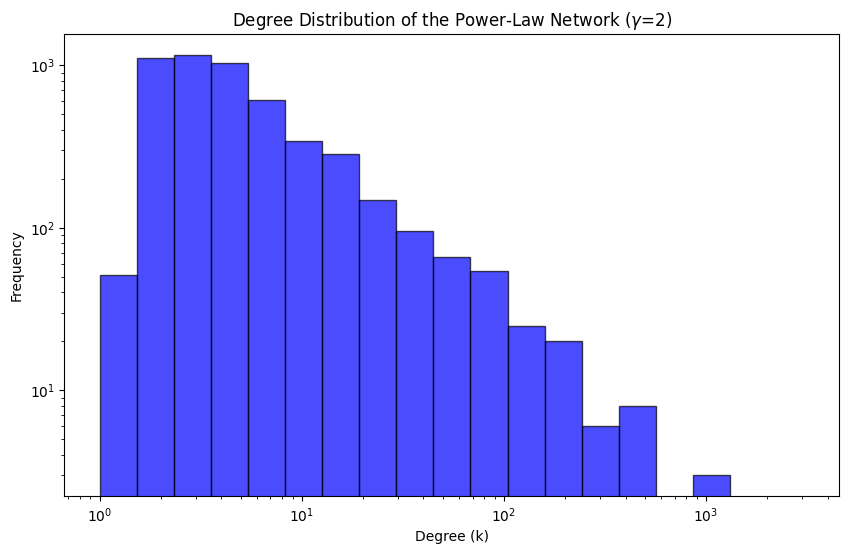

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the degree sequence
degree_sequence = [d for n, d in G.degree()]

# Define logarithmic bins
min_degree = min(degree_sequence)
max_degree = max(degree_sequence)
bins = np.logspace(np.log10(min_degree), np.log10(max_degree), num=20)

# Plot the histogram with logarithmic bins
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=bins, color='blue', alpha=0.7, edgecolor='black')

# Set the scales to logarithmic
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Degree (k)')
plt.ylabel('Frequency')
plt.title('Degree Distribution of the Power-Law Network ($\\gamma$=2)')

# Show the plot
plt.show()


The degree distribution plot above for the power-law network with $\gamma = 2$ shows a heavy-tailed distribution, where most nodes have low degrees, and a few nodes (hubs) have very high degrees. This is typical of power-law networks, characterized by a broad range of node degrees. The logarithmic scale on both axes highlights the large variance in degree frequencies, confirming the network’s scale-free nature. The presence of high-degree hubs ($k \approx 10^3$) suggests these nodes play a critical role in maintaining network connectivity, while the majority of nodes are minimally connected ($k \approx 10^0$ to $10^1$).


## *The friendship paradox and the configuration model*

#### **Now generate a network for the configuration model that has the same slope and number of nodes as F-BA in A above; let's call this new network F-CM (for friendship configuration model)**

To generate the **F-CM** network we will do the following steps:
- Generate the BA Network (F-BA) (we just re-use the previous instantiation)
- Extract the Degree Sequence from F-BA
- Create the Configuration Model Network (F-CM) using the degree sequence from F-BA


In [7]:
# Get the degree sequence from F_BA
degree_sequence = [degree for node, degree in F_BA.degree()]

In [8]:
# Ensure the sum of degrees is even
if sum(degree_sequence) % 2 != 0:
    # Adjust a random degree by adding 1
    idx = random.randint(0, n - 1)
    degree_sequence[idx] += 1

# Generate the configuration model network
F_CM = nx.configuration_model(degree_sequence)

# Convert to a simple graph (remove parallel edges and self-loops)
F_CM = nx.Graph(F_CM)  # Removes parallel edges
F_CM.remove_edges_from(nx.selfloop_edges(F_CM))  # Removes self-loops


In [9]:
iterations = 1000
paradox_count = 0
results = []

for _ in range(iterations):
    node, node_degree = get_node_degree(F_CM)
    avg_neighbor_degree = get_average_neighbor_degree(F_CM, node)
    paradox_holds = avg_neighbor_degree > node_degree
    paradox_count += paradox_holds
    results.append({
        'node': node,
        'node_degree': node_degree,
        'avg_neighbor_degree': avg_neighbor_degree,
        'paradox_holds': paradox_holds
    })

# Calculate the percentage
paradox_percentage = (paradox_count / iterations) * 100
print(f"The friendship paradox holds {paradox_count} out of {iterations} times ({paradox_percentage:.2f}%) in F-CM.")

The friendship paradox holds 846 out of 1000 times (84.60%) in F-CM.


The fact that the friendship paradox holds less frequently in **F-CM** (83.5%) compared to a power-law network with $ \gamma = 2 $ (99%) or **F_BA** (87%) is consistent with the structure of the networks:

- **Power-law with $ \gamma = 2 $** has a higher fraction due to the extreme presence of high-degree hubs.
- **F-BA** still has a relatively high fraction due to the preferential attachment and hub creation.
- **F-CM** has the lowest fraction due to the randomization of connections, which dilutes the effect of high-degree nodes.

Barabási, A.-L. (2016). *Network Science: Chapter 5 - Scale-Free Property*. [https://networksciencebook.com/chapter/5#introduction5](https://networksciencebook.com/chapter/5#introduction5)>

Let's visualize the degree distibution of **F-BA** and **F-BA** side-by-side:

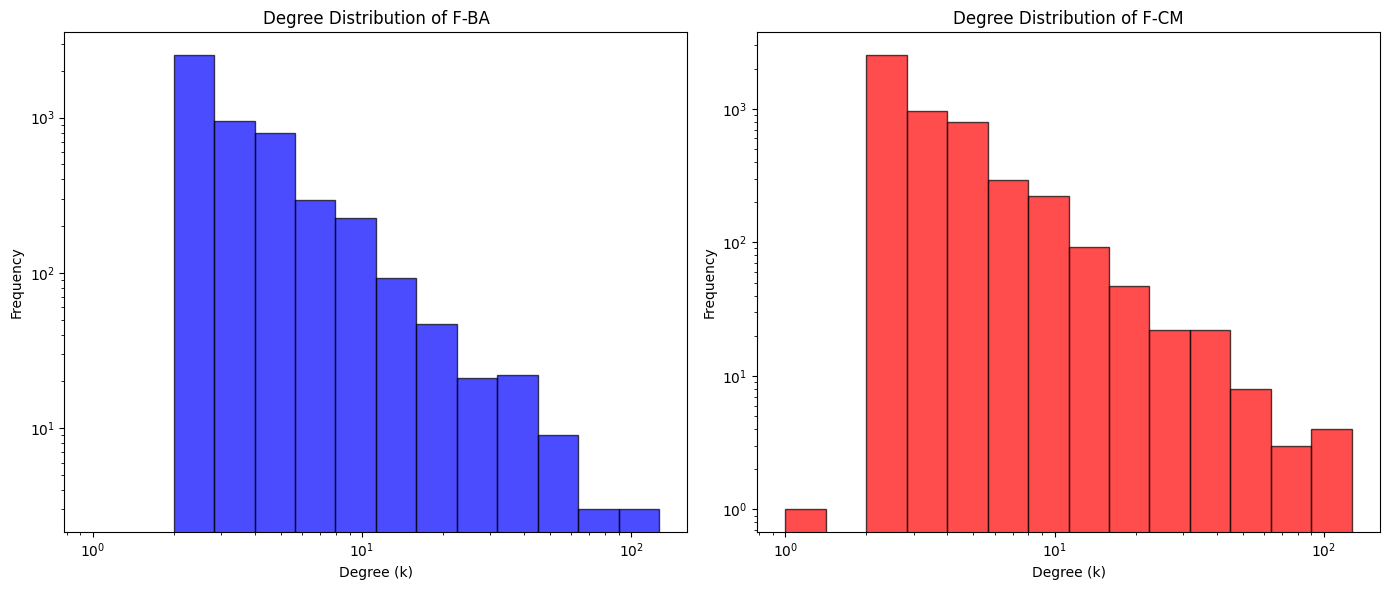

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Degree sequences for both F_BA and F_CM
degree_sequence_BA = [d for n, d in F_BA.degree()]
degree_sequence_CM = [d for n, d in F_CM.degree()]

# Define logarithmic bins based on the minimum and maximum degree across both networks
min_degree = min(min(degree_sequence_BA), min(degree_sequence_CM))
max_degree = max(max(degree_sequence_BA), max(degree_sequence_CM))
bins = np.logspace(np.log10(min_degree), np.log10(max_degree), num=15)

# Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot F_BA degree distribution on the left
ax1.hist(degree_sequence_BA, bins=bins, color='blue', alpha=0.7, edgecolor='black')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title('Degree Distribution of F-BA')
ax1.set_xlabel('Degree (k)')
ax1.set_ylabel('Frequency')

# Plot F_CM degree distribution on the right
ax2.hist(degree_sequence_CM, bins=bins, color='red', alpha=0.7, edgecolor='black')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title('Degree Distribution of F-CM')
ax2.set_xlabel('Degree (k)')
ax2.set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


The plot figure above compares the degree distributions of the **F-BA** (left, blue) and **F-CM** (right, red) networks. Both distributions exhibit a similar shape, following a power-law pattern, which reflects the shared degree sequence. However, the **F-BA** distribution shows a slightly more pronounced tail at higher degrees, indicating that F_BA may have more highly connected hubs due to the preferential attachment mechanism, whereas **F-CM** has more randomness in connections, slightly reducing the occurrence of extreme hub nodes.

#### **Assuming that F-BA and F-CM have the same degree sequence can now think about if F-BA and F-CM are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics**

##### **Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true?**

Network properties such as assortativity, clustering coefficient, and community structure play significant roles:

**Assortativity:** refers to the tendency of nodes to connect with others that have similar degree. In networks with positive assortativity (like social networks where people with many friends tend to be friends with each other), low-degree nodes are less likely to be connected to high-degree nodes, potentially reducing the frequency of the friendship paradox.

**Clustering coefficient:** measures how interconnected a node's neighbors are. High clustering can create local environments where nodes have similar degrees, which might affect the average neighbor degree and thus the occurrence of the friendship paradox.

**Community structure:** involves the presence of tightly knit groups within the network. Strong community structures can influence connectivity patterns, affecting how degrees are distributed among neighbors and impacting the paradox's frequency.

Newman, M. E. J. (2002). *Assortative Mixing in Networks*. Physical Review Letters, 89(20). [https://doi.org/10.1103/PhysRevLett.89.208701](http://dx.doi.org/10.1103/PhysRevLett.89.208701)

Newman, M. E. J. (2003). *Mixing patterns in networks*. Physical Review E, 67(2), 026126. [https://arxiv.org/pdf/cond-mat/0209450](https://arxiv.org/pdf/cond-mat/0209450)

#####  **How would you test more rigorously if the friendship-paradox is actually true equally often in F-BA and F-CM?**

To test more rigorously whether the friendship paradox is equally frequent in F-BA and F-CM, we can perform statistical hypothesis testing:

**Multiple Simulations:** Run a significant number of simulations (e.g., 30 or more) for each network type to collect data on how often the friendship paradox occurs.

**Calculate Statistics:** For each network, compute the mean and standard deviation of the fraction of times the paradox holds across simulations.

**Statistical Testing:** Use a statistical test like the t-test for independent samples to determine if there is a statistically significant difference between the means of the two networks. This involves formulating a null hypothesis that there is no difference in the frequency of the paradox between F-BA and F-CM.

**Visualizing with Error Bars:** Plot the mean frequencies with error bars representing the standard error or standard deviation. If the error bars overlap significantly, it suggests there may be no significant difference; if they don't, it indicates a potential significant difference.

This approach allows us to account for variability in the simulations and provides a more rigorous comparison of the friendship paradox frequency between the two networks.

**Implementation example**

The following is a barebones implementation of how one might test the two network structures in a rigourous way:

In [17]:
import numpy as np

# Number of simulations
num_simulations = 1000
iterations = 1000  # Iterations per simulation

# Function to simulate and calculate paradox frequency
def simulate_paradox_frequency(G, iterations):
    paradox_counts = []
    for _ in range(iterations):
        node, node_degree = get_node_degree(G)
        avg_neighbor_degree = get_average_neighbor_degree(G, node)
        paradox_holds = avg_neighbor_degree > node_degree
        paradox_counts.append(paradox_holds)
    return sum(paradox_counts) / iterations

# Collect frequencies for F_BA and F_CM
frequencies_F_BA = []
frequencies_F_CM = []

for _ in range(num_simulations):
    freq_F_BA = simulate_paradox_frequency(F_BA, iterations)
    frequencies_F_BA.append(freq_F_BA)
    
    freq_F_CM = simulate_paradox_frequency(F_CM, iterations)
    frequencies_F_CM.append(freq_F_CM)

# Calculate means and standard deviations
mean_F_BA = np.mean(frequencies_F_BA)
std_F_BA = np.std(frequencies_F_BA, ddof=1)

mean_F_CM = np.mean(frequencies_F_CM)
std_F_CM = np.std(frequencies_F_CM, ddof=1)

print(f"F_BA: Mean = {mean_F_BA:.4f}, Std Dev = {std_F_BA:.4f}")
print(f"F_CM: Mean = {mean_F_CM:.4f}, Std Dev = {std_F_CM:.4f}")

F_BA: Mean = 0.8822, Std Dev = 0.0098
F_CM: Mean = 0.8525, Std Dev = 0.0110


From the output above we see that the mean and standard deviation for **F-BA** and **F-CM** for 1000 simulations. From this we can clearly see that there is no overlap. Let's visualize the two fractions of paradoxes holding true:

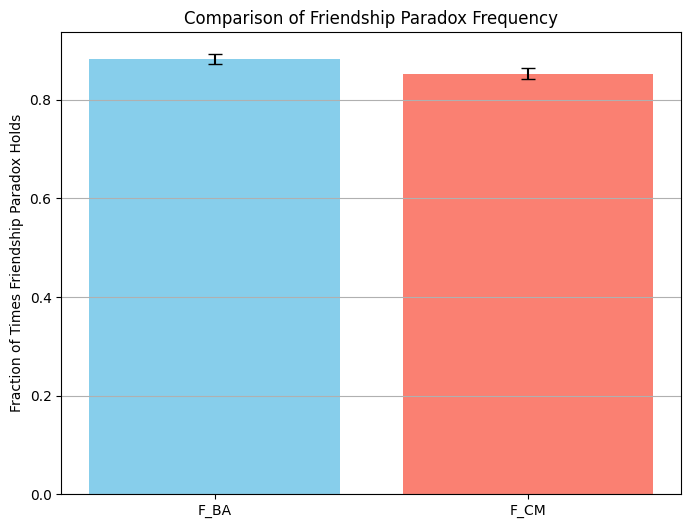

In [20]:
import matplotlib.pyplot as plt

# Plotting the mean frequencies with error bars
labels = ['F_BA', 'F_CM']
means = [mean_F_BA, mean_F_CM]
stds = [std_F_BA, std_F_CM]

plt.figure(figsize=(8, 6))
plt.bar(labels, means, yerr=stds, capsize=5, color=['skyblue', 'salmon'])
plt.ylabel('Fraction of Times Friendship Paradox Holds')
plt.title('Comparison of Friendship Paradox Frequency')
plt.grid(axis='y')
plt.show()

The non-overlapping error bars provide strong evidence that **F-CM** has a lower frequency of the friendship paradox compared to **F-BA**, likely due to the differences in how the networks are structured despite having the same degree distribution.

In [21]:
from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_value = ttest_ind(frequencies_F_BA, frequencies_F_CM, equal_var=False)

print(f"T-statistic = {t_stat:.4f}, P-value = {p_value:.4f}")

T-statistic = 63.8621, P-value = 0.0000


From the statistical test above we reject the null hypothesis which states that there is no difference between the mean frequencies of the friendship paradox in the **F-BA** (Barabási-Albert network) and **F-CM** (configuration model network) networks. The t-test results demonstrate that there is a statistically significant difference in how often the friendship paradox holds in the F-BA and F-CM networks.

## *Growth without preferential attachment*

##### **Grow a new network (the Sune-network) with the same parameters as the **F-BA** network**

First, we will grow a new network (the Sune-network) with the same parameters as the **F-BA** network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: *have the incoming nodes connect to the existing nodes with* **equal probability**. This is the Sune-network.

To generate the Sune network we conduct the following:
- Initial Step: Start with a small graph, typically a single edge between two nodes (e.g., nodes 0 and 1).
- Node Addition: Each new node is added sequentially.
- Connection Rule: When a new node is added, it is connected to an existing node chosen randomly, with equal probability across all existing nodes - we repeat for 5000 iterations

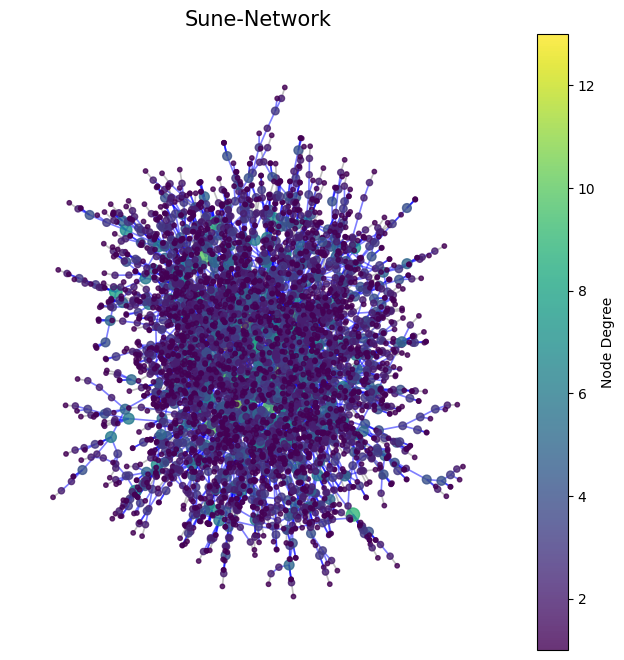

In [28]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create the Sune-Network
G4s = nx.Graph()
G4s.add_edge(0, 1)

def add_node_with_eq_prob(G4s):
    """Add a new node to the network and connect it to an existing node with equal probability."""   
    all_nodes = list(G4s.nodes)
    new_node = len(all_nodes)
    p = 1 / len(all_nodes)
    p_list = [p] * len(all_nodes)
    chosen_node = np.random.choice(all_nodes, p=p_list)
    G4s.add_edge(new_node, chosen_node)
    return G4s

# Add 5000 nodes to the network
for i in range(5000):
    add_node_with_eq_prob(G4s)                                                                                                           

# Visualize the Sune-Network
node_sizes = [G4s.degree(n) * 10 for n in G4s.nodes()]
node_colors = [G4s.degree(n) for n in G4s.nodes()]
edge_colors = ['gray' if G4s.degree(edge[0]) + G4s.degree(edge[1]) < 4 else 'blue' for edge in G4s.edges()]

plt.figure(figsize=(8, 8)) 
pos = nx.spring_layout(G4s, seed=42)

# Draw the network nodes with the color map
nodes = nx.draw_networkx_nodes(G4s, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, alpha=0.8)

# Draw the network edges
nx.draw_networkx_edges(G4s, pos, edge_color=edge_colors, alpha=0.5, width=1.2)
plt.axis('off')

# Add a colorbar for node degrees
plt.colorbar(nodes, label='Node Degree')

# Add a title and show the plot
plt.title("Sune-Network", fontsize=15)
plt.show()


##### **Generate an ER network of same number of nodes and links as the Sune-network.**

To generate the ER network of the same number of nodes and links as the Sune network we will follow this approach:
- Initial Setup: Define a fixed number of nodes (e.g., 5000).
- Edge Addition: A fixed number of edges is specified, and pairs of nodes are chosen randomly and connected.
- Random Selection: Each possible pair of nodes has an equal and independent probability of being connected. - we simply apply the `nx.gnm_random_graph(n, m)`

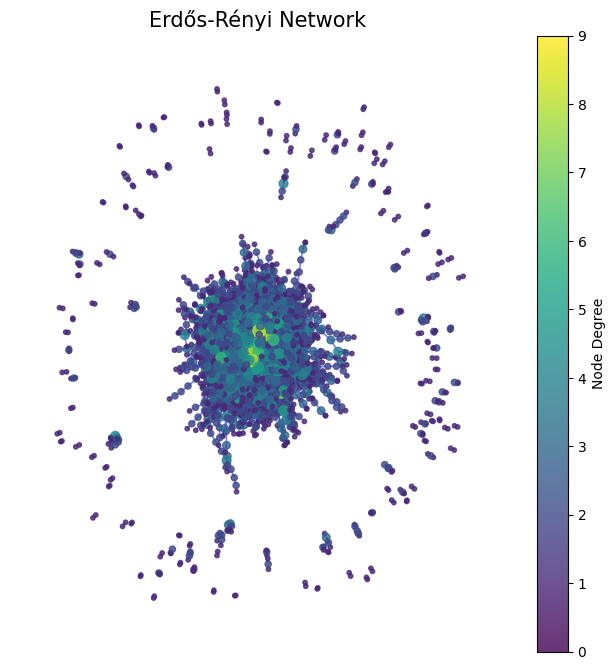

In [29]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Assuming G4s has already been created as in your previous code
num_edges = G4s.number_of_edges()
G4er = nx.gnm_random_graph(5000, num_edges)

# Visualize ER Network
node_sizes = [G4er.degree(n) * 10 for n in G4er.nodes()]  # Adjusted size scaling
node_colors = [G4er.degree(n) for n in G4er.nodes()]
edge_colors = ['gray' if G4er.degree(edge[0]) + G4er.degree(edge[1]) < 4 else 'blue' for edge in G4er.edges()]

plt.figure(figsize=(8, 8)) 
pos = nx.spring_layout(G4er, seed=42)

# Draw the network nodes with the color map
nodes = nx.draw_networkx_nodes(G4er, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, alpha=0.8)

# Draw the network edges
nx.draw_networkx_edges(G4er, pos, edge_color=edge_colors, alpha=0.5, width=1.2)
plt.axis('off')

# Add a colorbar for node degrees
plt.colorbar(nodes, label='Node Degree')

# Add a title and show the plot
plt.title("Erdős-Rényi Network", fontsize=15)
plt.show()

##### **What are the differences between the ER network and the Sune-network?**

To better understand this, we will plot the two degree distribution in the same plot:

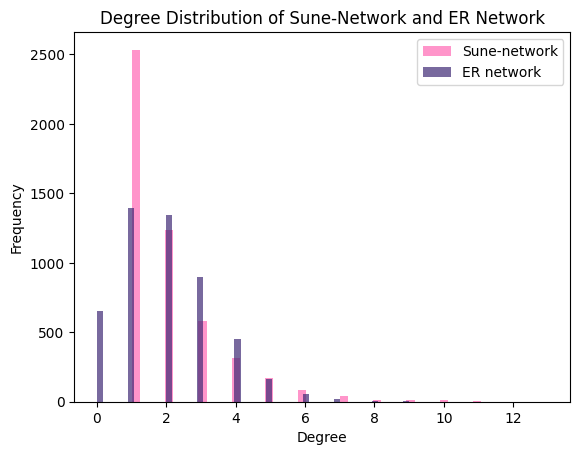

In [30]:
import matplotlib.pyplot as plt

sune_degrees = [G4s.degree(n) for n in G4s.nodes()]
er_degrees = [G4er.degree(n) for n in G4er.nodes()]

plt.hist(sune_degrees, bins=50, alpha=0.7, label='Sune-network', color='#FF69B4')  # Pink
plt.hist(er_degrees, bins=50, alpha=0.7, label='ER network', color='#3F2975')  # Purple
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.title("Degree Distribution of Sune-Network and ER Network")
plt.show()


The Sune-network was generated by connecting new nodes to existing ones with equal probability. Degrees of its nodes are concentrated on 1 or 2 as seen in the figure above. The reason for this is that each new node connects randomly, and existing nodes have an equal chance of being selected, meaning few nodes have considerably higher degree.

On the other hand, degrees of ER network are distributed in more bell-shaped, most of the nodes having a degree around average.

In [31]:
num_components_sune = nx.number_connected_components(G4s)
num_components_er = nx.number_connected_components(G4er)

print(f'Number of connected components in Sune-network: {num_components_sune}')
print(f'Number of connected components in ER network: {num_components_er}')


Number of connected components in Sune-network: 1
Number of connected components in ER network: 795


In the generating process of Sune-Network, each new node is guaranteed to connect to existing nodes, which ensures connectivity. Therefore, it remains as a single component as it grows.

Even though the ER network has the same number of nodes and edges, randomly distributed edges can can result in many small disconnected components.

# **Part 2: Stats of the Country Music Network**

## **Simple network statistics and analysis**

We load the Country Music Network that we constructed by extracting links of country musicians' wikipedia pages.

In [32]:
import networkx as nx
# load the graph
G = nx.read_graphml("data/graph.graphml")

##### **What is the number of nodes and links (edges) in the network?**

In [33]:
# Number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 2152
Number of edges: 18214


As seen in the print output above we have constructed a network of 2152 nodes and 18124 edges. That is, we have 2152 Country Musicians who's wikipedia pages are interconnected with 18124 links.

##### **Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?**

The degree distributions are essential to understand the structure of the network. We will plot both the in-degree and out-degree distributions.

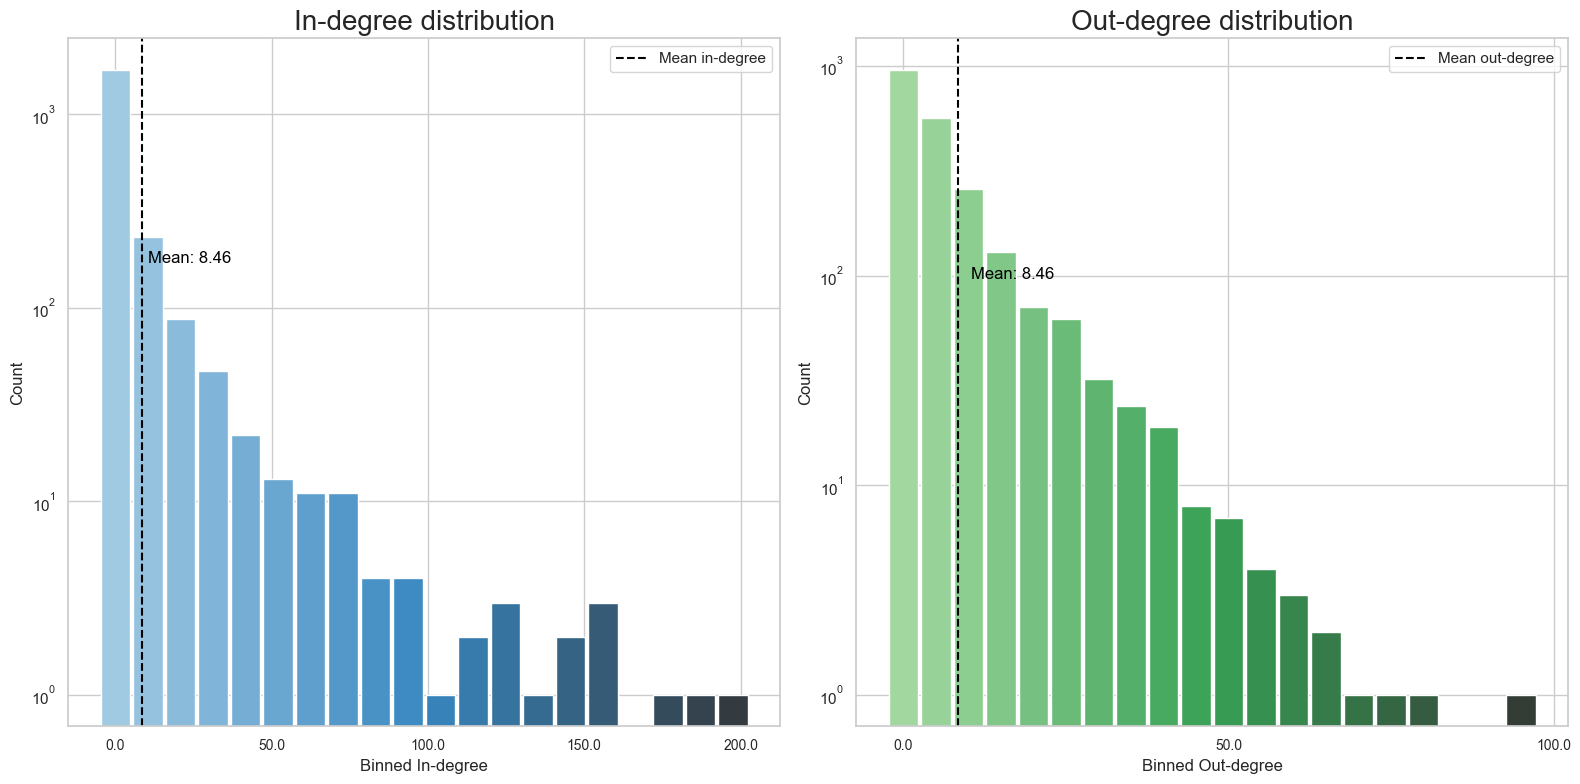

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# remove future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set a Seaborn theme for aesthetics
sns.set(style="whitegrid")

# Compute the in-degree and out-degree distributions
in_degrees = list(dict(G.in_degree()).values())
out_degrees = list(dict(G.out_degree()).values())

# Define the number of bins
num_bins = 20  # Decrease number of bins to make bars larger

# Binning the in-degree and out-degree values
in_hist, in_bins = np.histogram(in_degrees, bins=num_bins)
out_hist, out_bins = np.histogram(out_degrees, bins=num_bins)

# Create the plot for in-degree and out-degree distributions
fig, ax = plt.subplots(1, 2, figsize=(16, 8))  # Larger figure size for bigger bars

# Use plt.bar to control the width of bins
bar_width = (in_bins[1] - in_bins[0]) * 0.9  # Make bar width slightly smaller than bin width

# Plot the binned in-degree distribution using plt.bar
ax[0].bar(in_bins[:-1], in_hist, width=bar_width, color=sns.color_palette("Blues_d", num_bins))
ax[0].set_title("In-degree distribution")
ax[0].title.set_fontsize(20)
ax[0].set_xlabel("Binned In-degree")
ax[0].set_ylabel("Count")
# Set x-ticks at intervals of 50
ax[0].set_xticks(np.arange(0, max(in_bins) + 1, 50))
# Manually format x-tick labels to be more readable
ax[0].set_xticklabels(np.arange(0, max(in_bins) + 1, 50), fontsize=10)
# Calculate mean in-degree and plot the vertical line
mean_in_degree = np.mean(in_degrees)
ax[0].axvline(x=mean_in_degree, color='black', linestyle='--', label='Mean in-degree')
# Add text showing the mean in-degree value
ax[0].text(mean_in_degree + 2, max(in_hist) / 10, f'Mean: {mean_in_degree:.2f}', color='black', fontsize=12)
ax[0].set_yscale('log')
ax[0].legend()

# Plot the binned out-degree distribution using plt.bar
bar_width = (out_bins[1] - out_bins[0]) * 0.9  # Same adjustment for out-degree
ax[1].bar(out_bins[:-1], out_hist, width=bar_width, color=sns.color_palette("Greens_d", num_bins))
ax[1].set_title("Out-degree distribution")
ax[1].title.set_fontsize(20)
ax[1].set_xlabel("Binned Out-degree")
ax[1].set_ylabel("Count")
# Set x-ticks at intervals of 50
ax[1].set_xticks(np.arange(0, max(out_bins) + 1, 50))
# Manually format x-tick labels to be more readable
ax[1].set_xticklabels(np.arange(0, max(out_bins) + 1, 50), fontsize=10)
# Calculate mean out-degree and plot the vertical line
mean_out_degree = np.mean(out_degrees)
ax[1].axvline(x=mean_out_degree, color='black', linestyle='--', label='Mean out-degree')
# Add text showing the mean out-degree value
ax[1].text(mean_out_degree + 2, max(out_hist) / 10, f'Mean: {mean_out_degree:.2f}', color='black', fontsize=12)
ax[1].set_yscale('log')
ax[1].legend()
# Adjust layout and show the plot
plt.tight_layout()
plt.show()


From the plot above we see the in-degree distribution is left skewed because certain performers are frequently referenced, while the out-degree distribution is more uniform. Typically, the in-degree distribution is more skewed in real-world networks like Wikipedia than the out-degree distribution. This is because a few prominent musicians (e.g., historically significant figures) tend to have a lot of incoming links (in-degree) as they are referenced frequently by others. On the other hand, out-degree represents how often a musician's page links to others, which may vary less because pages tend to have more standardized structures or patterns for linking. This is analogous to the concept of your friends often having more friends than you which we have encounted during class in this course.

##### **Compare the out-degree distribution to a *random network* with the same number of nodes and links?**

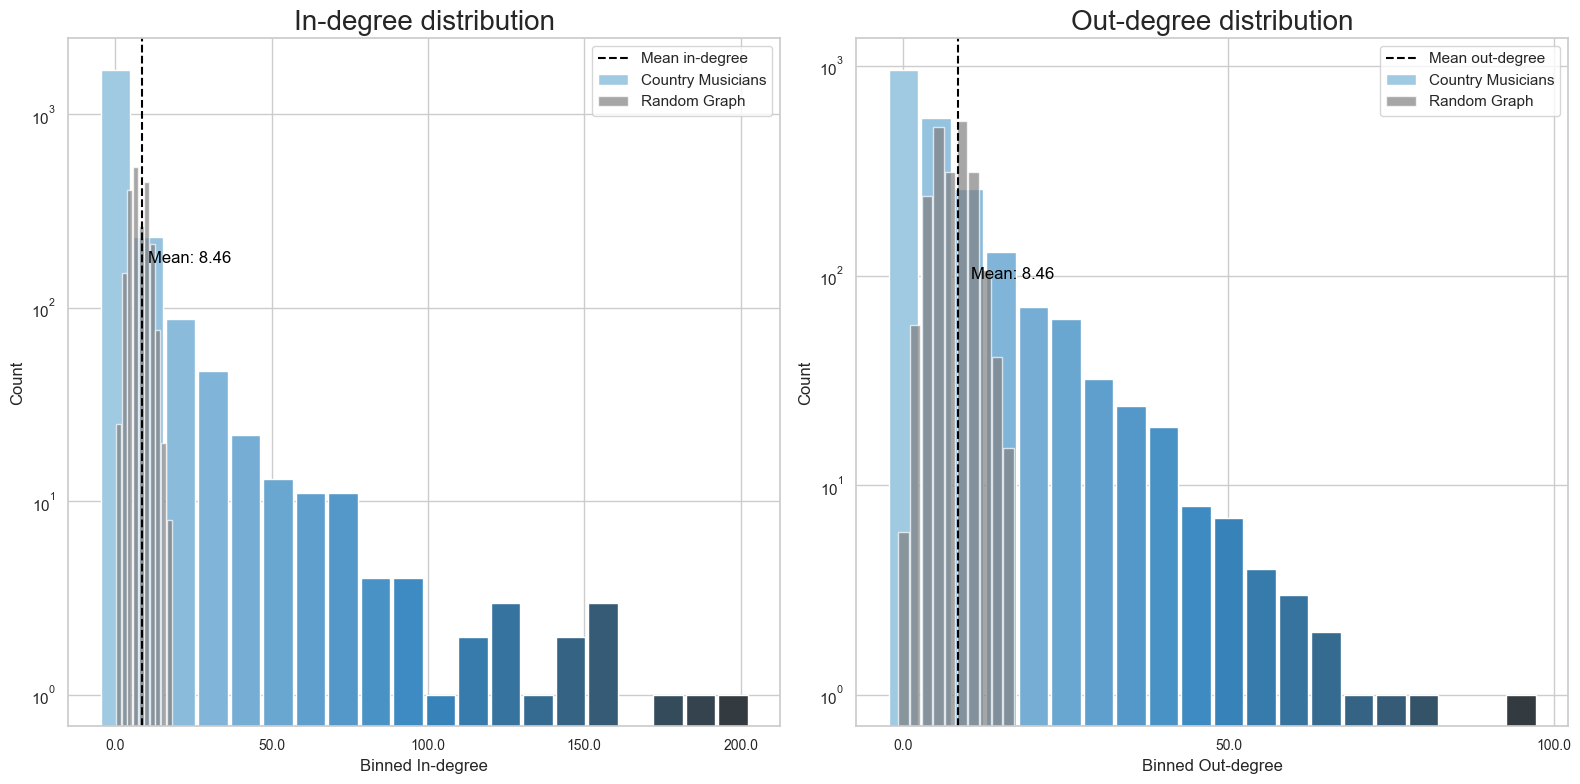

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx

# Set a Seaborn theme for aesthetics
sns.set(style="whitegrid")

# Parameters for the graph
number_nodes = 2152
number_edges = 18213

# Calculate the linking probability
linking_probability = number_edges / (number_nodes * (number_nodes - 1))
# print(f"The linking probability is {linking_probability:.10f}")

# Create a Random Graph
random_graph = nx.erdos_renyi_graph(number_nodes, linking_probability, directed=True)

# Get in-degree and out-degree distributions for the random graph
random_in_degrees = list(dict(random_graph.in_degree()).values())
random_out_degrees = list(dict(random_graph.out_degree()).values())

# Compute the binned histograms for in-degree and out-degree distributions
num_bins_country = 20  # Number of bins for Country Musicians
num_bins_random = 10  # Fewer bins for the random graph for clarity

# Histograms for Country Musicians Graph
in_hist, in_bins = np.histogram(in_degrees, bins=num_bins_country)
out_hist, out_bins = np.histogram(out_degrees, bins=num_bins_country)

# Histograms for Random Graph (with fewer bins)
random_in_hist, random_in_bins = np.histogram(random_in_degrees, bins=num_bins_random)
random_out_hist, random_out_bins = np.histogram(random_out_degrees, bins=num_bins_random)

# Create the plot for in-degree and out-degree distributions
fig, ax = plt.subplots(1, 2, figsize=(16, 8))  # Large figure size

# Use plt.bar to control the width of bins
bar_width_country = (in_bins[1] - in_bins[0]) * 0.9  # Adjust bar width for Country Musicians
bar_width_random = (random_in_bins[1] - random_in_bins[0]) * 0.9  # Adjust bar width for Random Graph

# Plot the binned in-degree distribution
ax[0].bar(in_bins[:-1], in_hist, width=bar_width_country, color=sns.color_palette("Blues_d", num_bins_country), label="Country Musicians")
ax[0].bar(random_in_bins[:-1], random_in_hist, width=bar_width_random, alpha=0.7, color="gray", label="Random Graph")
ax[0].set_title("In-degree distribution")
ax[0].title.set_fontsize(20)
ax[0].set_xlabel("Binned In-degree")
ax[0].set_ylabel("Count")
ax[0].set_xticks(np.arange(0, max(in_bins) + 1, 50))
ax[0].set_xticklabels(np.arange(0, max(in_bins) + 1, 50), fontsize=10)
mean_in_degree = np.mean(in_degrees)
ax[0].axvline(x=mean_in_degree, color='black', linestyle='--', label='Mean in-degree')
ax[0].text(mean_in_degree + 2, max(in_hist) / 10, f'Mean: {mean_in_degree:.2f}', color='black', fontsize=12)
ax[0].set_yscale('log')
ax[0].legend()

# Plot the binned out-degree distribution
bar_width_country = (out_bins[1] - out_bins[0]) * 0.9  # Adjust bar width for Country Musicians
bar_width_random = (random_out_bins[1] - random_out_bins[0]) * 0.9  # Adjust bar width for Random Graph

ax[1].bar(out_bins[:-1], out_hist, width=bar_width_country, color=sns.color_palette("Blues_d", num_bins_country), label="Country Musicians")
ax[1].bar(random_out_bins[:-1], random_out_hist, width=bar_width_random, alpha=0.7, color="gray", label="Random Graph")
ax[1].set_title("Out-degree distribution")
ax[1].title.set_fontsize(20)
ax[1].set_xlabel("Binned Out-degree")
ax[1].set_ylabel("Count")
ax[1].set_xticks(np.arange(0, max(out_bins) + 1, 50))
ax[1].set_xticklabels(np.arange(0, max(out_bins) + 1, 50), fontsize=10)
mean_out_degree = np.mean(out_degrees)
ax[1].axvline(x=mean_out_degree, color='black', linestyle='--', label='Mean out-degree')
ax[1].text(mean_out_degree + 2, max(out_hist) / 10, f'Mean: {mean_out_degree:.2f}', color='black', fontsize=12)
ax[1].set_yscale('log')
ax[1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In a random network, edges are assigned between nodes uniformly at random, resulting in a more bell-curve-like distribution. In contrast, real-world networks (like Wikipedia links) are often not random, because pages are structured and follow patterns of influence and relevance. This phenomena is exactly what we see in the two plots above. We note that the scale of the x-axis is twice as large in the left plot compared to the right which makes variance of the Random Graph distribution look different.

##### **Compare the in-degree distribution to a scale-free network with the same number of nodes**

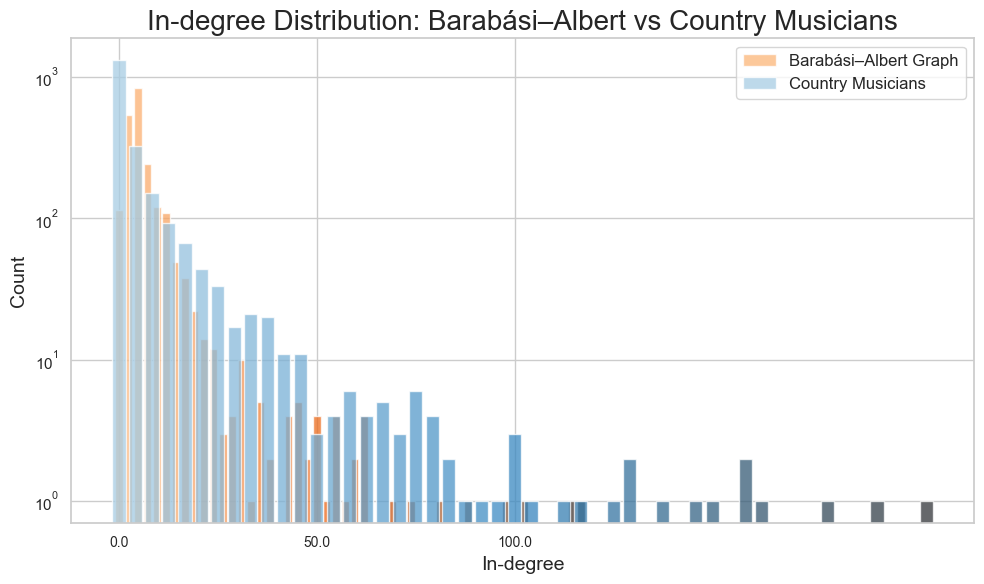

In [36]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a Seaborn theme for aesthetics
sns.set(style="whitegrid")

# Parameters for the graph
number_nodes = 2152
number_edges = 18213

# Generate a Barabási–Albert undirected graph
m = number_edges // number_nodes
ba_graph = nx.barabasi_albert_graph(number_nodes, m)

# Convert to a directed graph by randomly assigning directions
directed_ba_graph = nx.DiGraph()

# Add directed edges to the new directed graph
for u, v in ba_graph.edges():
    if random.random() > 0.5:
        directed_ba_graph.add_edge(u, v)  # u -> v
    else:
        directed_ba_graph.add_edge(v, u)  # v -> u

# Now we can get in-degree and out-degree for each node
in_degree_dict = dict(directed_ba_graph.in_degree())
out_degree_dict = dict(directed_ba_graph.out_degree())

# In-degree and out-degree distributions
ba_in_degrees = list(in_degree_dict.values())
ba_out_degrees = list(out_degree_dict.values())

# Set number of bins for histogram
num_bins = 50

# Compute histogram for Barabási–Albert in-degrees and Country Musicians in-degrees
ba_in_hist, ba_in_bins = np.histogram(ba_in_degrees, bins=num_bins)
musicians_in_hist, musicians_in_bins = np.histogram(in_degrees, bins=num_bins)

# Plot the in-degree distribution for Country Musicians and BA graph
fig, ax = plt.subplots(figsize=(10, 6))  # Larger figure size for better clarity

# Adjust bar width for better visualization
bar_width_ba = (ba_in_bins[1] - ba_in_bins[0]) * 0.8
bar_width_musicians = (musicians_in_bins[1] - musicians_in_bins[0]) * 0.8

# Plot Barabási–Albert in-degree distribution
ax.bar(ba_in_bins[:-1], ba_in_hist, width=bar_width_ba, color=sns.color_palette("Oranges_d", num_bins), alpha=0.75, label='Barabási–Albert Graph')

# Plot Country Musicians in-degree distribution
ax.bar(musicians_in_bins[:-1], musicians_in_hist, width=bar_width_musicians, color=sns.color_palette("Blues_d", num_bins), alpha=0.75, label='Country Musicians')

# Title, labels, and legend
ax.set_title("In-degree Distribution: Barabási–Albert vs Country Musicians", fontsize=20)
ax.set_xlabel("In-degree", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# Set x-ticks at intervals of 50
ax.set_xticks(np.arange(0, max(ba_in_bins) + 1, 50))
ax.set_xticklabels(np.arange(0, max(ba_in_bins) + 1, 50), fontsize=10)

# Set log scale for y-axis for better visualization of distributions
ax.set_yscale('log')

# Add a legend
ax.legend(fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Scale-free networks follow a power law where a few nodes dominate with many connections, while most nodes have very few. This is a more accurate model for Wikipedia-style networks, where a few musicians are highly influential (linked by many), while most are referenced much less frequently. Comparing your in-degree distribution to a scale-free network helps confirm whether the structure of Wikipedia links reflects real-world phenomena, like a small number of central, influential musicians. From the figure above we see that the two graphs overlap quite nicely with the Country Musician network having slight more spread. Interestingly, we see how there is large count of 0 and 1 in-degrees - meaning there's virtually no if any pages linking to those pages. To confirm this observation we quantify what the two most frequently occuring in-degrees are:

In [37]:
# What is the most orruring value in the list in_degrees
from collections import Counter
# Calculate the most common in-degree value
in_degree_counter = Counter(in_degrees)
most_common_in_degree, second_most_common_in_degree = in_degree_counter.most_common(2)

print(f"The most common in-degree value is {most_common_in_degree[0]} with {most_common_in_degree[1]} occurrences.")
print(f"The second most common in-degree value is {second_most_common_in_degree[0]} with {second_most_common_in_degree[1]} occurrences.")

The most common in-degree value is 0 with 462 occurrences.
The second most common in-degree value is 1 with 338 occurrences.


As evident by the print output above we see that there is 800 occurences of in-degree being 0 or 1 which supports the very large bar on the left of the histogram above. We also see some outliers on the right-most side with a few small bins around the 200 in-degrees - these are the top-most connected country musicians which we will look into in the section below.

##### **Who are the top 5 most connected performers? Is this what you would have expected?**

In [38]:
# The top 5 nodes in G with the most connections
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:5]

print(f"The most connected musicians in the network are:\n")
for node, degree in top_nodes:
    print(f"- {node}:")
    print(f"\tTotal connections: {degree}")
    print(f"\tOut-degree: {G.out_degree(node)}")
    print(f"\tIn-degree: {G.in_degree(node)}\n")

    # print(f"Neighbors: {list(G.neighbors(node))}")


# print the highest in-degree and out-degree nodes in the graph
max_in_degree = max(dict(G.in_degree()).items(), key=lambda x: x[1])
max_out_degree = max(dict(G.out_degree()).items(), key=lambda x: x[1])

print(f"The node with the highest in-degree is {max_in_degree[0].replace('_', ' ')} with {max_in_degree[1]} connections.")
print(f"The node with the highest out-degree is {max_out_degree[0].replace('_', ' ')} with {max_out_degree[1]} connections.")

The most connected musicians in the network are:

- Willie_Nelson:
	Total connections: 257
	Out-degree: 49
	In-degree: 208

- Johnny_Cash:
	Total connections: 237
	Out-degree: 44
	In-degree: 193

- Merle_Haggard:
	Total connections: 219
	Out-degree: 60
	In-degree: 159

- George_Jones:
	Total connections: 213
	Out-degree: 54
	In-degree: 159

- Vince_Gill:
	Total connections: 212
	Out-degree: 71
	In-degree: 141

The node with the highest in-degree is Willie Nelson with 208 connections.
The node with the highest out-degree is Hillary Lindsey with 100 connections.


 In the print output above we see the top 5 performers most connected performers in the Country Musician Netowrk. For the highest in-degrees, you are essentially finding the most referenced or central figures in the network. These individuals are essentially the most referenced or central figures in the network (in Country Music). High out-degrees indicate musicians whose Wikipedia pages reference many others, possibly indicating more collaborative or influential figures in terms of connecting with a broad range of other artists.

 The results are essentially what you would expect as the top 5 most connected performers have indeed had signifianct real-world influence within country music. Willie Nelson who has 257 connections is known for his legendary status in country music as described in [Willie Nelson - Wikipedia](https://en.wikipedia.org/w/index.php?title=Special:CiteThisPage&page=Willie_Nelson&id=1247568168)
 
 His high in-degree suggests that many Wikipedia pages reference him, which is consistent with his long and influential career. His out-degree also indicates he has connections to many other artists, likely through collaborations and his impact on the genre. 

##### **What are the 10 pages with the longest wiki entries?**

We find the top 10 pages based on the length of their Wikipedia content.

In [39]:
# Top 10 nodes by content length
top_nodes_by_content_length = sorted(G.nodes(data=True), key=lambda x: x[1]['length_of_content'], reverse=True)[:10]

print("\nTop 10 nodes by content length:\n")
for node, data in top_nodes_by_content_length:
    print("-", node.replace('_', ' '), f"({data['length_of_content']} words)")


Top 10 nodes by content length:

- Beyoncé (30257 words)
- Bob Dylan (29694 words)
- Justin Bieber (27311 words)
- Taylor Swift (26871 words)
- Carrie Underwood (26245 words)
- Miley Cyrus (25041 words)
- Elvis Presley (24410 words)
- Justin Timberlake (22590 words)
- Demi Lovato (21146 words)
- Linda Ronstadt (20980 words)


In the cell output above we see the top 10 longest wikipedia pages in the network. The results are a bit surprising as many musicians that you seldomly associate with country music, like Beyoncé and Justin Bieber, appear among the top 10 pages with the longest Wikipedia entries. This suggests that the content length of their wikipedia page is not a good predictor of connectivity of influence on Country music but rather that globally famous musicians have more extensive content due to their wide-reaching influence. While figures like Bob Dylan and Taylor Swift have strong ties to country, others like Miley Cyrus and Elvis Presley span multiple genres.

## **Let's build a simple visualization of the network**

To visualize the network, we convert it to an undirected graph and use nx.draw_kamada_kawai for visualization. We customize the node size based on the degree (i.e., the number of connections) and use the node color to reflect the length of each musician's Wikipedia content, providing an intuitive way to represent both their centrality in the network and the amount of information available on them.

We use the weakly connected component (WCC) to identify the Giant Connected Component (GCC) in a directed graph because it helps capture the largest subset of nodes that are connected, regardless of the direction of the edges. In a directed network like ours (where nodes represent country musicians and edges represent links between them), a weakly connected component ensures that we consider the overall structure of the network by treating all edges as undirected. Using the GCC means that we will disregard isolated or smaller disconnected subgraphs, which might not provide much insight into the central connections among musicians. Before moving on to the visualization of the GCC let us briefly investigate the isolated nodes.

In [40]:
isolated_nodes = [node for node in G.nodes if G.degree(node) == 0]
print(f"Isolated nodes: {len(isolated_nodes)}")

# print the names of the isolated nodes
print("\n10 isolated nodes:\n")
for node in isolated_nodes[:10]:
    print("-", node.replace('_', ' '))

Isolated nodes: 119

10 isolated nodes:

- Coffey Anderson
- Luke Bell (musician)
- Ridley Bent
- Annie Bosko
- Brown & Gray
- Tracey Brown
- James Carter and the Prisoners
- Jason Cassidy
- Cee Cee Chapman
- Donovan Chapman


As seen above there are 119 isolated nodes in the graph - meaning these musicians dont have any connections to other musicians in the graph. :( This leaves us with a GCC of 2024 nodes. 

Let's visualize this network!

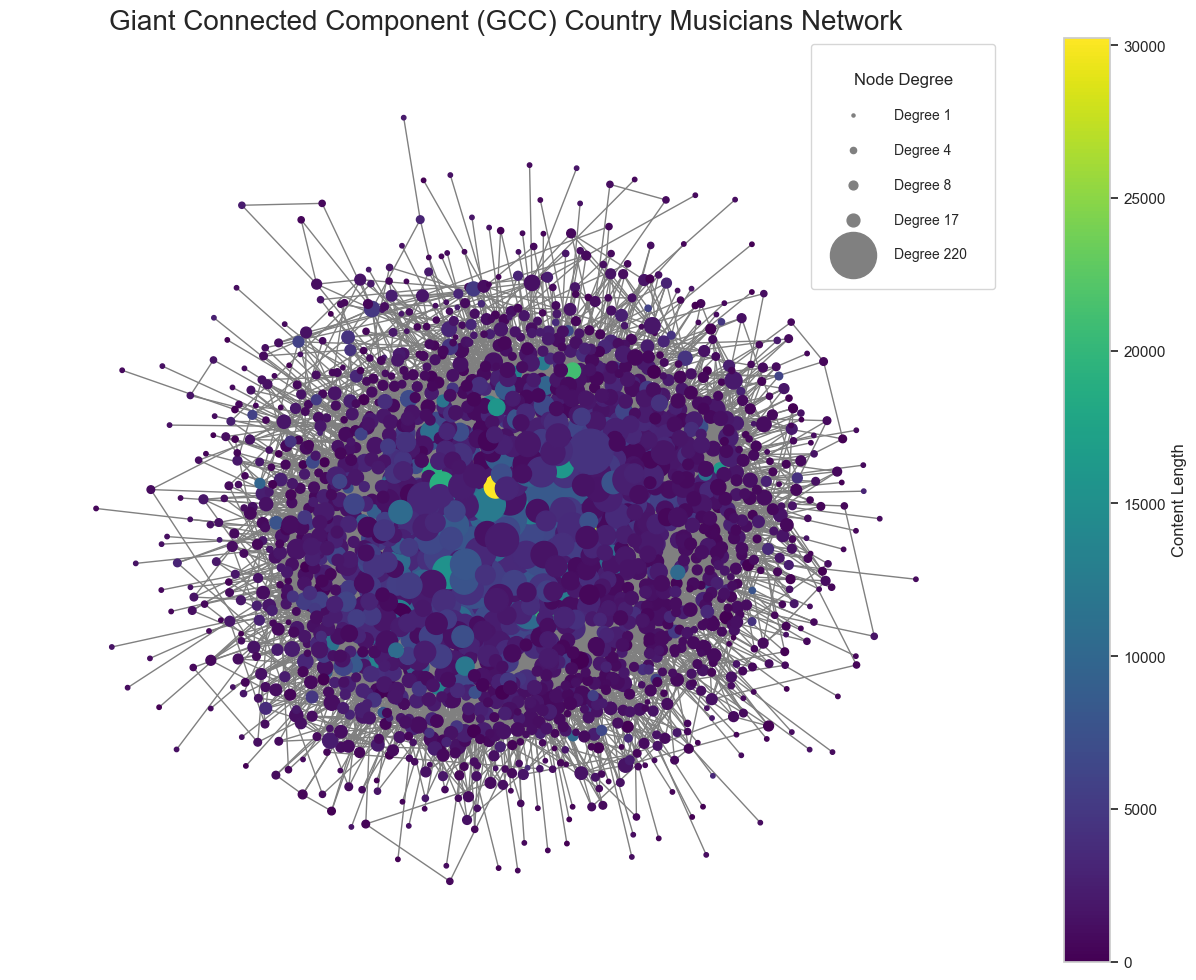

In [41]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import networkx as nx

# Get the Giant Connected Component (GCC)
gcc = max(nx.weakly_connected_components(G), key=len)

# Convert the GCC to an undirected graph
gcc_undirected = G.subgraph(gcc).to_undirected()

# Get the degree for each node in the GCC (used for node size)
degree_dict = dict(gcc_undirected.degree())

# Get the length_of_content attribute for each node (used for node color)
node_color_values = [data['length_of_content'] for node, data in gcc_undirected.nodes(data=True)]

# Normalize node size by degree (for better scaling in the plot)
node_size = [degree_dict[node] * 10 for node in gcc_undirected.nodes()]

# Define vmin and vmax for color normalization
vmin = min(node_color_values)
vmax = max(node_color_values)

# Plot using Kamada-Kawai layout
plt.figure(figsize=(16, 12))
pos = nx.kamada_kawai_layout(gcc_undirected)

# Draw edges
nx.draw_networkx_edges(gcc_undirected, pos, edge_color='gray')

# Draw nodes
nodes = nx.draw_networkx_nodes(
    gcc_undirected, 
    pos,
    node_size=node_size, 
    node_color=node_color_values, 
    cmap='viridis',
    vmin=vmin,
    vmax=vmax
)

# Create colorbar using the nodes
cbar = plt.colorbar(nodes)
cbar.set_label('Content Length')

# Create legend for node sizes (degrees)
degrees = list(degree_dict.values())
quartiles = [min(degrees), 
             sorted(degrees)[len(degrees)//4],  # 1st quartile
             sorted(degrees)[len(degrees)//2],  # Median (2nd quartile)
             sorted(degrees)[(3*len(degrees))//4],  # 3rd quartile
             max(degrees)]

# Scale down the largest degree size for the legend
size_legend_handles = []
labels = []
for deg in quartiles:
    size = deg * 5
    handle = plt.scatter([], [], s=size, edgecolors='gray', facecolors='gray')
    size_legend_handles.append(handle)
    labels.append(f'Degree {deg}')

# Adjust the spacing and size of the legend box
plt.legend(size_legend_handles, labels,
           scatterpoints=1, loc='upper right', 
           title='Node Degree',
           labelspacing=1.5,      
           handletextpad=2.0,  
           borderpad=2.0,       
           fontsize=10,       
           frameon=True) 

# Set title
plt.title("Giant Connected Component (GCC) Country Musicians Network", fontsize=20)

# Show plot
plt.axis('off')
plt.show()


The visualization of the Giant Connected Component (GCC) of the country musicians network shows a dense, interconnected core, where node size corresponds to the degree (number of connections) and color represents the length of each musician's Wikipedia content. Larger, more central nodes, like Willie Nelson and Johnny Cash, are highlighted by their high degree and significant content length, while peripheral nodes are smaller and less connected, indicating less centrality in the network. The gradient color scale provides an additional layer of insight into the depth of information available for each musician.